In [43]:
%matplotlib notebook

In [44]:
# This is my first ML project after completing a ML course on coursera.
# https://www.kaggle.com/c/sf-crime

from matplotlib import pyplot as plt
train = pd.read_csv("/home/scott/Documents/kaggle_data/SanFran/train.csv")
test = pd.read_csv("/home/scott/Documents/kaggle_data/SanFran/test.csv")
train.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [45]:
# Dropping useless data - the data that's absent in the test dataset or coordinates (we have the district instead)
train.drop(['X', 'Y', 'Descript', 'Resolution'], inplace=True, axis=1)
test.drop(['X', 'Y'], inplace=True, axis=1)

In [46]:
#Assumptions:
#District, time of day and day of the week are three big predictors of the category of crime.

In [47]:
sorted(train.DayOfWeek.unique())

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [48]:
days = list(zip(sorted(train.DayOfWeek.unique()), [5, 1, 6, 7, 4, 2, 3]))
days_dict = {k : v for k, v in days}
days_dict

{'Friday': 5,
 'Monday': 1,
 'Saturday': 6,
 'Sunday': 7,
 'Thursday': 4,
 'Tuesday': 2,
 'Wednesday': 3}

In [49]:
train.DayOfWeek = train.DayOfWeek.map(days_dict)
test.DayOfWeek = test.DayOfWeek.map(days_dict)

In [50]:
train['weekend'] = train.DayOfWeek.apply(lambda x: 1 if x in [5, 6, 7] else 0)
test['weekend'] = test.DayOfWeek.apply(lambda x: 1 if x  in [5, 6, 7] else 0)

In [51]:
train.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [52]:
district_dict = dict(zip(train.PdDistrict.unique(), list(range(len(train.PdDistrict.unique())))))
district_dict

{'BAYVIEW': 3,
 'CENTRAL': 5,
 'INGLESIDE': 2,
 'MISSION': 8,
 'NORTHERN': 0,
 'PARK': 1,
 'RICHMOND': 4,
 'SOUTHERN': 9,
 'TARAVAL': 6,
 'TENDERLOIN': 7}

In [53]:
train.PdDistrict = train.PdDistrict.map(district_dict)
test.PdDistrict = test.PdDistrict.map(district_dict)

In [54]:
train.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,weekend
0,2015-05-13 23:53:00,WARRANTS,3,0,OAK ST / LAGUNA ST,0
1,2015-05-13 23:53:00,OTHER OFFENSES,3,0,OAK ST / LAGUNA ST,0
2,2015-05-13 23:33:00,OTHER OFFENSES,3,0,VANNESS AV / GREENWICH ST,0
3,2015-05-13 23:30:00,LARCENY/THEFT,3,0,1500 Block of LOMBARD ST,0
4,2015-05-13 23:30:00,LARCENY/THEFT,3,1,100 Block of BRODERICK ST,0


In [55]:
train['hour'] = train.Dates.str.findall("\d\d\s(\d\d):\d\d:\d\d").apply(lambda x: int(x[0]))
test['hour'] = test.Dates.str.findall("\d\d\s(\d\d):\d\d:\d\d").apply(lambda x: int(x[0]))

In [56]:
def get_time_of_day(hour):
    # differentiating day and night
    if hour in [23, 0, 1, 2, 3, 4, 5, 6, 7]:
        return 1
    elif hour in range(7, 23):
        return 2

In [57]:
train['daynight'] = train['hour'].apply(get_time_of_day)
test['daynight'] = test['hour'].apply(get_time_of_day)

In [58]:
# Now I would like to visualize some data about the properties of each crime category
train.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [59]:
lista = []
for crime in train.Category.unique():
    subset = train[train.Category == crime]
    lista.append([crime, subset.daynight.value_counts()[1], 
                  subset.daynight.value_counts()[2]])   

In [60]:
night_summary = pd.DataFrame(lista, columns=['crime', 'night', 'day'])

night_summary['% night'] = night_summary.apply(lambda row:\
                                               round(row['night'] / sum([row['night'], row['day']]), 2), axis=1)

In [61]:
night_summary.sort_values("% night")

,crime,night,day,% night
38,PORNOGRAPHY/OBSCENE MAT,3,19,0.14
34,GAMBLING,21,125,0.14
13,DRUG/NARCOTIC,8879,45092,0.16
26,FAMILY OFFENSES,85,406,0.17
2,LARCENY/THEFT,31939,142961,0.18
20,RUNAWAY,341,1605,0.18
27,LIQUOR LAWS,366,1537,0.19
17,MISSING PERSON,4873,21116,0.19
12,FORGERY/COUNTERFEITING,2168,8441,0.20
35,BAD CHECKS,85,321,0.21


In [62]:
# I expected it to be a bit different - I thought many more incidents would happen at night.
# Here only DUI happens mainly at night. I wonder if this is because there are more officers in the streets
# during daytime, or if crimes that happened at night are reported the next day.
# Bottom Line - I thought this feature would be stronger.

In [63]:
train.head(10)

,Dates,Category,DayOfWeek,PdDistrict,Address,weekend,hour,daynight
0,2015-05-13 23:53:00,WARRANTS,3,0,OAK ST / LAGUNA ST,0,23,1
1,2015-05-13 23:53:00,OTHER OFFENSES,3,0,OAK ST / LAGUNA ST,0,23,1
2,2015-05-13 23:33:00,OTHER OFFENSES,3,0,VANNESS AV / GREENWICH ST,0,23,1
3,2015-05-13 23:30:00,LARCENY/THEFT,3,0,1500 Block of LOMBARD ST,0,23,1
4,2015-05-13 23:30:00,LARCENY/THEFT,3,1,100 Block of BRODERICK ST,0,23,1
5,2015-05-13 23:30:00,LARCENY/THEFT,3,2,0 Block of TEDDY AV,0,23,1
6,2015-05-13 23:30:00,VEHICLE THEFT,3,2,AVALON AV / PERU AV,0,23,1
7,2015-05-13 23:30:00,VEHICLE THEFT,3,3,KIRKWOOD AV / DONAHUE ST,0,23,1
8,2015-05-13 23:00:00,LARCENY/THEFT,3,4,600 Block of 47TH AV,0,23,1
9,2015-05-13 23:00:00,LARCENY/THEFT,3,5,JEFFERSON ST / LEAVENWORTH ST,0,23,1


In [64]:
# We can extract another feature from address. A lot of theft happens in the street - hence "block of" in address
# On the contrary, I assume that every burglary would have a precise address

In [65]:
train[train.Category == "BURGLARY"].head(10)

,Dates,Category,DayOfWeek,PdDistrict,Address,weekend,hour,daynight
49,2015-05-13 19:52:00,BURGLARY,3,1,1500 Block of HAIGHT ST,0,19,2
87,2015-05-13 18:30:00,BURGLARY,3,3,1300 Block of FELTON ST,0,18,2
97,2015-05-13 18:00:00,BURGLARY,3,9,0 Block of 6TH ST,0,18,2
104,2015-05-13 17:55:00,BURGLARY,3,9,1200 Block of MARKET ST,0,17,2
124,2015-05-13 17:20:00,BURGLARY,3,5,600 Block of JONES ST,0,17,2
129,2015-05-13 17:00:00,BURGLARY,3,0,500 Block of GROVE ST,0,17,2
181,2015-05-13 14:45:00,BURGLARY,3,9,800 Block of FOLSOM ST,0,14,2
189,2015-05-13 14:30:00,BURGLARY,3,2,700 Block of MIRAMAR AV,0,14,2
208,2015-05-13 14:00:00,BURGLARY,3,2,100 Block of MELROSE AV,0,14,2
210,2015-05-13 14:00:00,BURGLARY,3,6,200 Block of CRESTLAKE DR,0,14,2


In [66]:
# Damn that's not true

In [67]:
cat_map = list(zip(sorted(train.Category.unique()), range(len(train.Category.unique()))))
cat_map = {k : v for k, v in cat_map}
train['Category'] = train['Category'].map(cat_map)

<IPython.core.display.Javascript object>


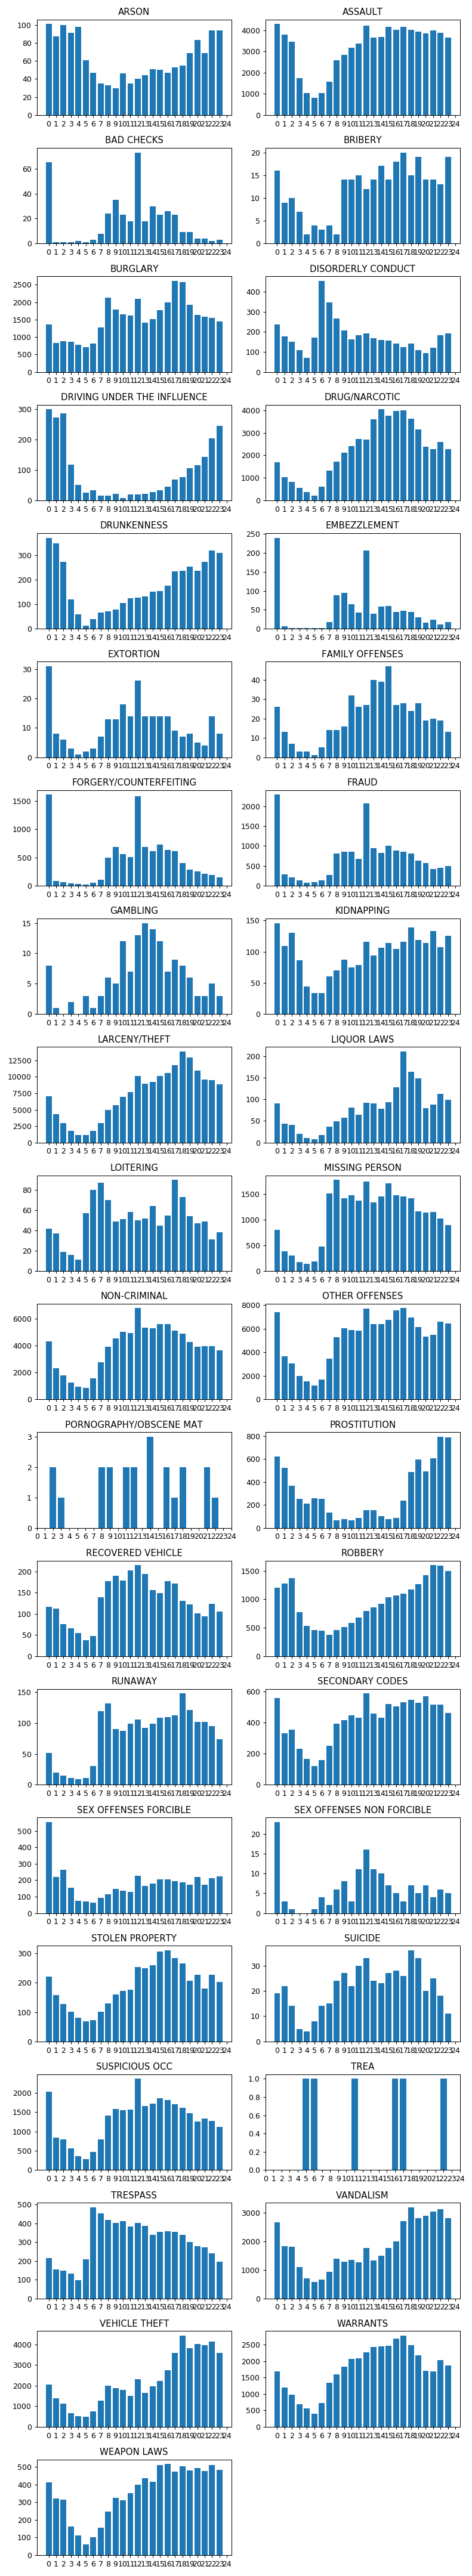

In [68]:
# I'm having doubts if my night-day categorization is actually supported by data, let's check this

# recommendation: plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.figure(figsize=(4.4 * 2, 2.4 * 20))

i = 1
for crime in sorted(train.Category.unique()):
    subset = train[train.Category == crime]
    
    # number rows, number cols, plot number to use
    plt.subplot(20, 2, i)
    plt.bar(left=sorted(set(subset.hour)), height=subset.groupby("hour").size().values)
    plt.title("{}".format(list(cat_map.keys())[list(cat_map.values()).index(crime)]))

    ax = plt.gca()
    ax.set_xticks(range(25)) # this accepts only integers
    #ax.set_xticklabels(np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))
    i += 1
#plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
plt.tight_layout()

In [69]:
# Conclusion - I think the day-night division isn't very accurate.
# I will just use the hour

<IPython.core.display.Javascript object>


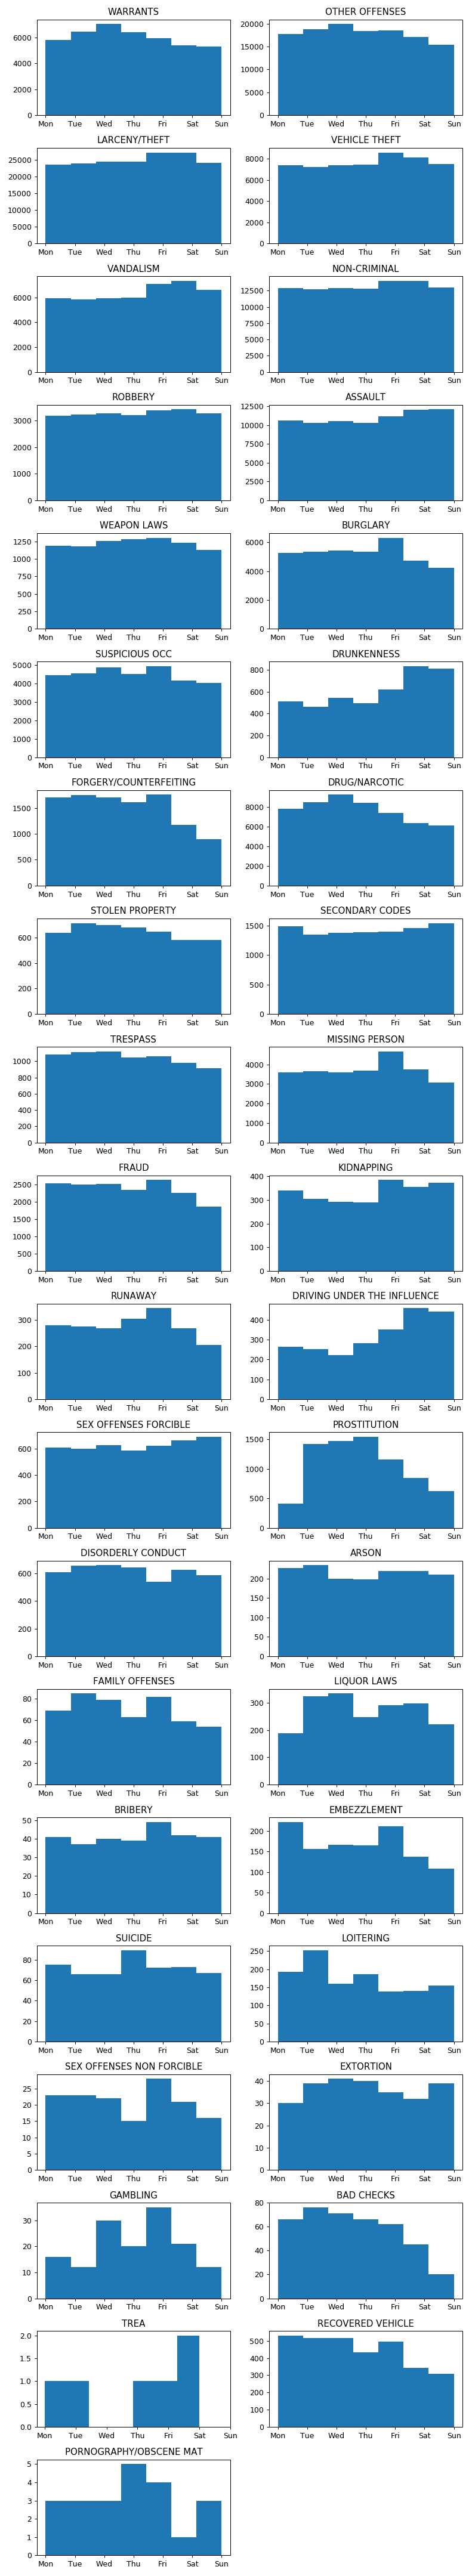

In [70]:
plt.figure(figsize=(4.4 * 2, 2.4 * 20))
i = 1
for crime in train.Category.unique():
    subset = train[train.Category == crime]

    plt.subplot(20, 2, i)
    plt.hist(subset.DayOfWeek, bins=7)
    plt.title("{}".format(list(cat_map.keys())[list(cat_map.values()).index(crime)]))

    ax = plt.gca()
    ax.set_xticks(range(1, 8)) # this accepts only integers
    ax.set_xticklabels(np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))
    i += 1
plt.tight_layout()


In [71]:
# Okay so what these graphs tell me is that I could engineer the Day of Week feature and
# make it a binary one - weekend vs not weekend

In [72]:
#train.DayOfWeek = train.DayOfWeek.apply(lambda x: 1 if x in [5, 6, 7] else 0)
#test.DayOfWeek = test.DayOfWeek.apply(lambda x: 1 if x in [5, 6, 7] else 0)

<IPython.core.display.Javascript object>


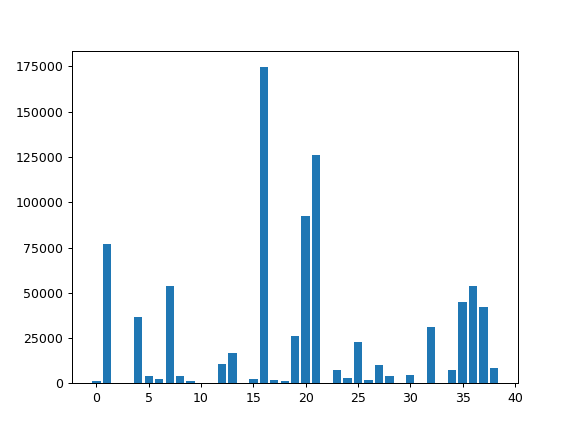

<Container object of 39 artists>

In [73]:
# Let's see if we have to to do unbalanced class distribution
grouped = train.groupby("Category").size()
plt.figure()
plt.bar(left=grouped.index, height=grouped.values)

In [74]:
# We definately do, which is to keep in mind for the KNN model, as we should not use the majority vote
# As then the class with most incidence will skew the results, I will use weighted

<IPython.core.display.Javascript object>


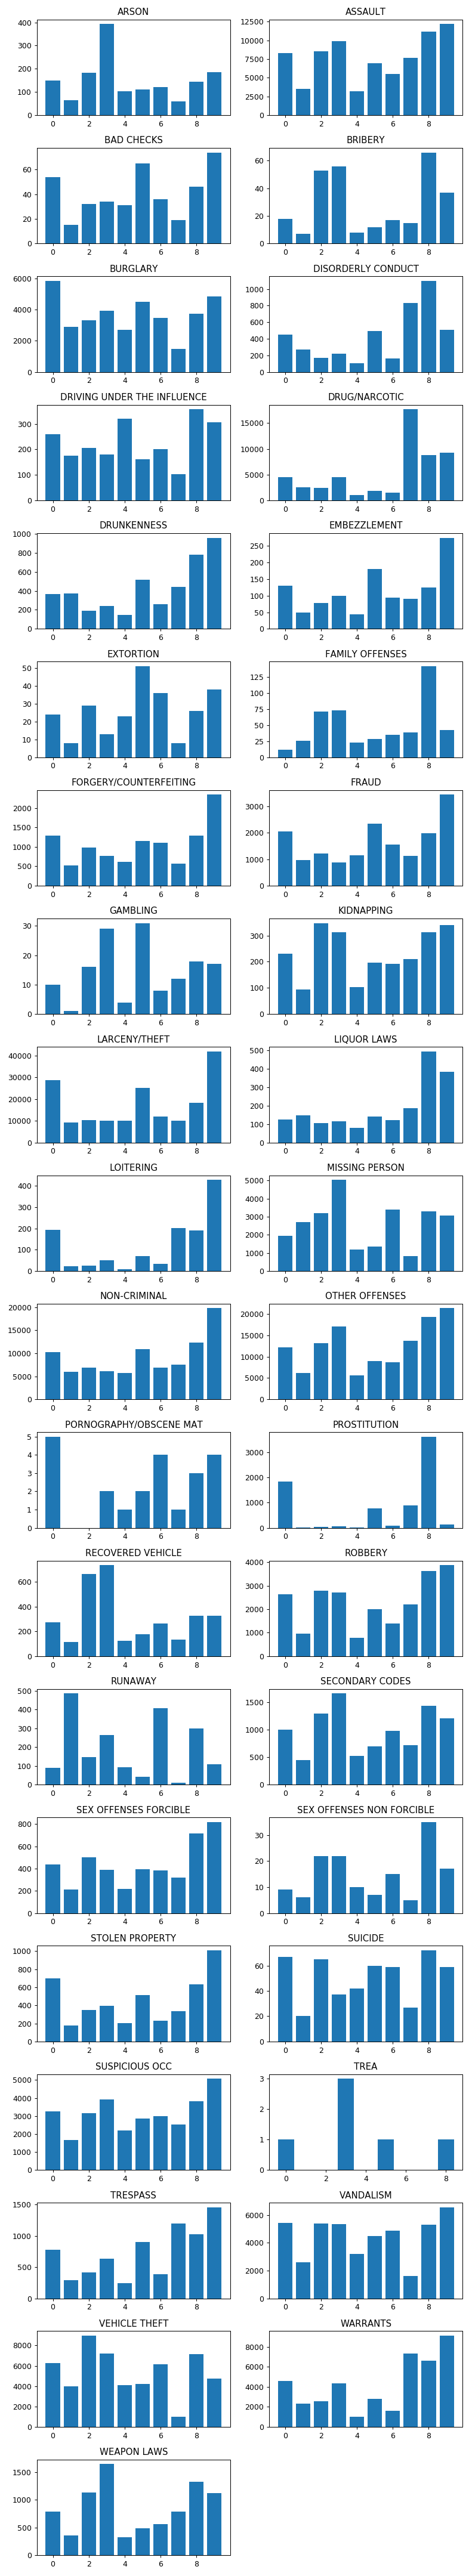

In [75]:
# What about districts?
# I'm having doubts if my night-day categorization is actually supported by data, let's check this

plt.figure(figsize=(4.4 * 2, 2.4 * 20))
i = 1

for crime in sorted(train.Category.unique()):
    subset = train[train.Category == crime]
    plt.subplot(20, 2, i)
    plt.bar(left=sorted(set(subset.PdDistrict)), height=subset.groupby("PdDistrict").size().values)
    plt.title("{}".format(list(cat_map.keys())[list(cat_map.values()).index(crime)]))
    i += 1
plt.tight_layout()

In [37]:
train.hour

0         23
1         23
2         23
3         23
4         23
5         23
6         23
7         23
8         23
9         23
10        22
11        22
12        22
13        22
14        22
15        22
16        22
17        21
18        21
19        21
20        21
21        21
22        21
23        21
24        21
25        21
26        21
27        21
28        21
29        20
          ..
878019     2
878020     2
878021     2
878022     2
878023     2
878024     2
878025     2
878026     2
878027     2
878028     2
878029     1
878030     1
878031     1
878032     1
878033     1
878034     1
878035     0
878036     0
878037     0
878038     0
878039     0
878040     0
878041     0
878042     0
878043     0
878044     0
878045     0
878046     0
878047     0
878048     0
Name: hour, Length: 878049, dtype: int64

In [42]:
train

,Dates,Category,DayOfWeek,PdDistrict,Address,weekend,hour,daynight
0,2015-05-13 23:53:00,37,0,0,OAK ST / LAGUNA ST,0,23,1
1,2015-05-13 23:53:00,21,0,0,OAK ST / LAGUNA ST,0,23,1
2,2015-05-13 23:33:00,21,0,0,VANNESS AV / GREENWICH ST,0,23,1
3,2015-05-13 23:30:00,16,0,0,1500 Block of LOMBARD ST,0,23,1
4,2015-05-13 23:30:00,16,0,1,100 Block of BRODERICK ST,0,23,1
5,2015-05-13 23:30:00,16,0,2,0 Block of TEDDY AV,0,23,1
6,2015-05-13 23:30:00,36,0,2,AVALON AV / PERU AV,0,23,1
7,2015-05-13 23:30:00,36,0,3,KIRKWOOD AV / DONAHUE ST,0,23,1
8,2015-05-13 23:00:00,16,0,4,600 Block of 47TH AV,0,23,1
9,2015-05-13 23:00:00,16,0,5,JEFFERSON ST / LEAVENWORTH ST,0,23,1


<IPython.core.display.Javascript object>


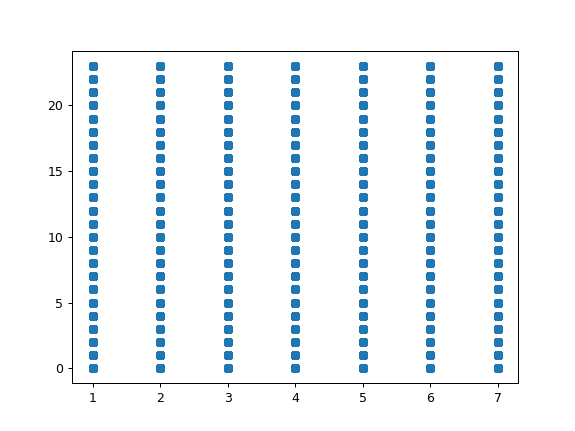

In [76]:
plt.figure()
plt.scatter(train.DayOfWeek, train.hour)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [ ]:
train_sample = train.sample(frac=0.5, random_state=99)
y_sample = train_sample()

y = train['Category']
train.drop(['Category'], axis=1, inplace=True)

In [ ]:
### RANDOM FOREST ###

# With no engineered features as benchmark
X = np.array(train[['DayOfWeek', 'PdDistrict', 'hour']])
y = np.array(y)

classifier = RandomForestClassifier(n_estimators=15)
clf = classifier.fit(X, y)
test_submit = test[['DayOfWeek', 'PdDistrict', 'hour']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("random_forest_15_original_features.csv", sep=",", index=False)

# KAGGLE SCORE: 2.85935
# The lower the score, the better

In [ ]:
### KNN ###

# With no engineered features as benchmark

X = np.array(train[['DayOfWeek', 'PdDistrict', 'hour']])
y = np.array(y)

classifier = classifier = KNeighborsClassifier(n_neighbors=100)
clf = classifier.fit(X, y)
test_submit = test[['DayOfWeek', 'PdDistrict', 'hour']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("KNN_100_original_features.csv", sep=",", index=False)

# KAGGLE SCORE: 4.22670

In [84]:
### KNN ###

# With no engineered features as benchmark DISTANCE - weighted

X = np.array(train[['DayOfWeek', 'PdDistrict', 'hour']])
y = np.array(y)

classifier = classifier = KNeighborsClassifier(n_neighbors=100, weights='distance')
clf = classifier.fit(X, y)
test_submit = test[['DayOfWeek', 'PdDistrict', 'hour']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("KNN_100_original_features_weights_distance.csv", sep=",", index=False)

# KAGGLE SCORE:4.23060

In [82]:
### RANDOM FOREST ###

# With weekend - no weekend
X = np.array(train[['PdDistrict', 'hour', 'weekend']])
y = np.array(y)

classifier = RandomForestClassifier(n_estimators=15)
clf = classifier.fit(X, y)
test_submit = test[['PdDistrict', 'hour', 'weekend']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("random_forest_15_weekend.csv", sep=",", index=False)

# KAGGLE SCORE: 2.64136

In [86]:
### RANDOM FOREST ###

# With weekend - no weekend AND daytime - nighttime
X = np.array(train[['PdDistrict', 'daynight', 'weekend']])
y = np.array(y)

classifier = RandomForestClassifier(n_estimators=15)
clf = classifier.fit(X, y)
test_submit = test[['PdDistrict', 'daynight', 'weekend']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("random_forest_15_weekend_and_daynight.csv", sep=",", index=False)

# KAGGLE SCORE: 2.60497

# Okay so this is the highest score so far. The choice of features is correct.
# Now I have to fine tune the model. I have to sample the data as otherwise I get memory errors.

In [ ]:
X = np.array(train[['PdDistrict', 'daynight', 'weekend']])
X = X.sample(frac=0.5, random_state=99)
y = np.array(y)

In [37]:
X = np.array(train)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [67]:
# Let's test different models with different parameters
# The competition requires submitting probabilities of each class.
# I don't know how to check my score for multiclass probabilities output
# So I will predict class, pick the model with best score, and use predict_proba using this model and submit.


# With daynight

for n in [10, 15, 40, 70, 100]:
    classifier = RandomForestClassifier(n_estimators=n)
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.22225006169
15 0.22225006169
40 0.22225006169
70 0.22225006169
100 0.22225006169


In [38]:
# With hour

for n in [10, 15, 40, 70, 100]:
    classifier = RandomForestClassifier(n_estimators=n)
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.225769223469
15 0.226251352429
40 0.225757834596
70 0.225951445438
100 0.225985612057


In [68]:
# With daynight

for n in [10, 15, 40, 70, 100, 200, 500, 1000]:
    classifier = KNeighborsClassifier(n_neighbors=n)
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.174655961126
15 0.170741985081
40 0.211354706452
70 0.21398173984
100 0.213404703605
200 0.216847939563
500 0.22188182146
1000 0.221209877949


In [39]:
# With hour

for n in [10, 15, 40, 70]:
    classifier = KNeighborsClassifier(n_neighbors=n)
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.164796993338
15 0.179055862422
40 0.203317958355
70 0.21401970275


In [47]:
for n in [10, 15, 40, 70, 100, 200, 500]:
    classifier = KNeighborsClassifier(n_neighbors=n, weights='distance')
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.172738834159
15 0.187255851034
40 0.208215173775
70 0.211703965226
100 0.214368961525
200 0.219865990927
500 0.220648026878


MemoryError: 

In [43]:
# SUBMISSION
classifier = RandomForestClassifier(n_estimators=15)
clf = classifier.fit(X, y)
test_submit = test[['DayOfWeek', 'PdDistrict', 'hour']]
pred = clf.predict_proba(np.array(test_submit))
# 1 Score: 2.61441, with all days of week
# 2 Score: 2.60499 with weekend no weekend class
# 3 Score: 3.53940 with KNN with weights=distance
# https://www.kaggle.com/c/sf-crime/leaderboard

In [44]:
final = pd.DataFrame(pred)

final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)

final.reset_index(inplace=True)

final.to_csv("random_forest_15_hour.csv", sep=",", index=False)